In [435]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from scipy import integrate
from IPython.display import HTML

In [436]:
#Definimos las constantes
G= 6.67e-11
mT= 5.9736e24
rT=6.3781e6
mL= 0.07349e24
rL= 1.7374e6
d= 3.844e8
v0_=11230/d
#Para tierra estática y la luna en orbita circular
w= 2.6617e-6
mN=1
tetha=np.radians(42)
phi0=np.radians(25.76)
r0=rT/d
pr_0=v0_*np.cos(tetha-phi0)
pphi_0=r0*v0_*np.sin(tetha-phi0)
print(v0_)


dt = 100
tmax = 2400000
t = np.arange(0.,tmax,dt)
h = t[1] - t[0]

r0_=(r0,phi0,pr_0,pphi_0)
rm_=(1,0,0,w)

2.9214360041623307e-05


In [437]:

def System(r,t):


    r_=r[0]
    phi=r[1]
    pr_=r[2]
    pphi_= r[3]

    eq1=pr_
    eq2= pphi_/(r_**2)
    u= np.sqrt(1+r_**2 -2*r_*np.cos(phi-w*t))
    mu= mL/mT
    delta= (G*mT)/(d**3)

    eq3=(pphi_**2)/(r_**3) -delta*((1/r_**2) + (mu/u**3)*(r_-np.cos(phi-w*t)))
    eq4= (-1)*(delta*mu*r_)/(u**3) * np.sin(phi-w*t)

    return np.array([eq1,eq2,eq3,eq4])


In [438]:
def Increment(f,r,t,h):

    state1 = np.array([r[0],r[1],r[2],r[3]])
    K1 = f(state1,t)

    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2],r[3]+0.5*h*K1[3]])
    K2 = f(state2,t+0.5*h)

    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2],r[3]+0.5*h*K2[3]])
    K3 = f(state3,t+0.5*h)

    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2],r[3]+h*K3[3]])
    K4 = f(state4, t+h)

    Deltaf = h*(K1+2*K2+2*K3+K4)


    return r+Deltaf

In [439]:
def Adaptativo(f,r0,t,r0m,e=1e-5):

    num=len(t)

    h = t[1] - t[0]
    dt=h

    tf = t[-1]
    t = t[0]

    r = r0

    Time = np.array([t])
    R=[r[0]]
    T=[r[1]]
    P=[r[2]]
    L=[r[3]]
    Steps = np.array([h])

    rm = r0m

    i=1

    Timem = np.array([t])
    Rm=[rm[0]]
    Tm=[rm[1]]
    Pm=[rm[2]]
    Lm=[rm[3]]
    Stepsm = np.array([h])

    for i in range(num):

        rm = (1,rm[1]+w*dt,0,w)
        Rm.append(rm[0])
        Tm.append(rm[1])
        Pm.append(rm[2])
        Lm.append(rm[3])



    while t < tf:

        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,Delta1,t+h,h)
        Delta3 = Increment(f,r,t,2*h)

        error=  np.linalg.norm(Delta2- Delta3)

        if error < e:
                t += 2*h
                r = Delta3




                Steps = np.append(Steps,h )
                Time = np.append(Time,t)

                R.append(r[0])
                T.append(r[1])
                P.append(r[2])
                L.append(r[3])



        h = h*(0.85*(e/error)**(1/4))




    return Time,Steps,R,T,P,L,Rm,Tm,Pm,Lm

In [440]:
t1,h1,R,T,P,L,Rm,Tm,Pm,Lm= Adaptativo(System,r0_,t,rm_)

In [441]:
dt = 100
tmax = 2400000
t = np.arange(0.,tmax,dt)
scale = 1000
t1 = t[::scale]

print(len(R[::38]))
print(len(t[::285]))


31
85


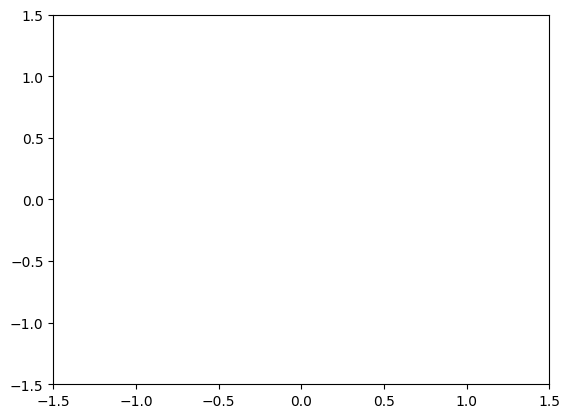

In [442]:

def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

fig, ax = plt.subplots()
def init():
  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)

def Update(i):


    init()

    r_over_time1 =R[::38][i]


    theta_over_time1 =T[::38][i]

    xa, ya = polar_to_cartesian(r_over_time1, theta_over_time1)

    ax.scatter(0,0,s=100,color='g')

    ax.scatter(xa,ya,color='k')


    circle = plt.Circle((xa,ya),0.05,color='r',fill=True)

    ax.add_patch(circle)

    r_over_time2 =Rm[::285][i]
    theta_over_time2 =Tm[::285][i]
    xb, yb = polar_to_cartesian(r_over_time2, theta_over_time2)
    ax.scatter(0,0,s=100,color='g')
    ax.scatter(xb,yb,color='b')
    circle = plt.Circle((xb,yb),0.05,color='b',fill=True)
    ax.add_patch(circle)

Animation = anim.FuncAnimation(fig,Update,frames=30,init_func=init)
HTML(Animation.to_html5_video())